## Treinando ADs em alguns datasets


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# carregando o dataset MNIST
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False) # 28x28
#X, y = load_digits(return_X_y=True) # 8x8 -> 10 classes (0,...,9)

In [3]:
# Dividindo os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, shuffle=True)

In [4]:
X_train.shape

(49000, 784)

In [5]:
# Instanciamos a AD e treinamos no conjunto de treinamento
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [6]:
# Predição no conjunto de testes
preds = clf.predict(X_test)

In [7]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2077
           1       0.94      0.96      0.95      2385
           2       0.86      0.85      0.86      2115
           3       0.84      0.83      0.84      2117
           4       0.87      0.88      0.87      2004
           5       0.82      0.82      0.82      1900
           6       0.89      0.89      0.89      2045
           7       0.89      0.90      0.90      2189
           8       0.83      0.81      0.82      2042
           9       0.83      0.84      0.84      2126

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



In [8]:
# Agora treinaremos outros modelos para comparar com a AD:

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.linear_model import LogisticRegression

In [9]:
#lr = LogisticRegression(solver='liblinear', C=0.05, random_state=0, multi_class='ovr')
#lr.fit(X_train, Y_train)
svm = SVC(kernel='rbf', C=100)
svm.fit(X_train, Y_train)

SVC(C=100)

In [10]:
# Predição no conjunto de testes
#preds_lr = lr.predict(X_test)
preds_svm = svm.predict(X_test)

print(classification_report(Y_test, preds_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2385
           2       0.97      0.99      0.98      2115
           3       0.98      0.97      0.98      2117
           4       0.98      0.98      0.98      2004
           5       0.98      0.98      0.98      1900
           6       0.98      0.98      0.98      2045
           7       0.98      0.98      0.98      2189
           8       0.98      0.97      0.98      2042
           9       0.98      0.97      0.97      2126

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



In [11]:
print("AD:", preds, "vs. LR:",preds_svm)

AD: ['0' '4' '1' ... '9' '0' '1'] vs. LR: ['0' '4' '1' ... '9' '0' '1']


In [12]:
# Normalizando os dados...

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

In [14]:
svm2 = SVC(kernel='rbf', C=100)
svm2.fit(x_train, Y_train)

SVC(C=100)

In [15]:
# Normalizando as amostras do conjunto de testes:
x_test = scaler.transform(X_test)

# em seguida, chamamos a função predict, passando o conjunto de teste:
y_pred = svm2.predict(x_test)

In [16]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2077
           1       0.99      0.99      0.99      2385
           2       0.91      0.98      0.94      2115
           3       0.97      0.96      0.97      2117
           4       0.97      0.97      0.97      2004
           5       0.97      0.96      0.96      1900
           6       0.98      0.97      0.97      2045
           7       0.97      0.96      0.97      2189
           8       0.97      0.96      0.96      2042
           9       0.97      0.95      0.96      2126

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [17]:
print("AD:", preds, "vs. LR (normalização):", y_pred)

AD: ['0' '4' '1' ... '9' '0' '1'] vs. LR (normalização): ['0' '4' '1' ... '9' '0' '1']


In [18]:
clf2 = DecisionTreeClassifier()
clf2.fit(x_train, Y_train)

#x_test = scaler.transform(X_test)
y_pred2 = clf2.predict(x_test)
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2077
           1       0.93      0.96      0.94      2385
           2       0.87      0.85      0.86      2115
           3       0.84      0.83      0.84      2117
           4       0.85      0.88      0.87      2004
           5       0.82      0.81      0.81      1900
           6       0.89      0.89      0.89      2045
           7       0.90      0.90      0.90      2189
           8       0.82      0.80      0.81      2042
           9       0.83      0.82      0.83      2126

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



In [19]:
print("AD (normalização):", y_pred2, "vs. LR (normalização):", y_pred)

AD (normalização): ['0' '4' '1' ... '9' '0' '1'] vs. LR (normalização): ['0' '4' '1' ... '9' '0' '1']


Agora, podemos mostrar a estrutura de uma AD completa, treinada em todos os atributos do dataset:

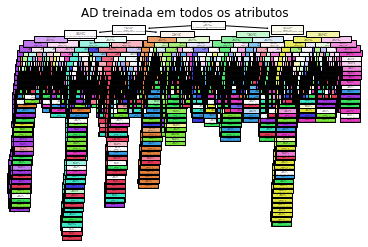

In [22]:
from sklearn.tree import plot_tree

plt.figure()
#clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf2, filled=True)
plt.title("AD treinada em todos os atributos")
plt.savefig("ad_mnist", dpi=300, bbox_inches='tight')
plt.show()

Desafio: Montar uma Random Forest, utilizando as AD do próprio scikit, para classificar os dígitos do MNIST.